# Digit recognition with CNN using Keras

<hr>

In [1]:
#Loading libraries / methods:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization

%matplotlib inline

In [2]:
#train = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
test = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")

In [3]:
#Loading and splitting the dataset:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


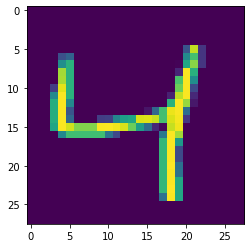

In [4]:
#Visualizing the inputs:
plt.imshow(x_train[2])

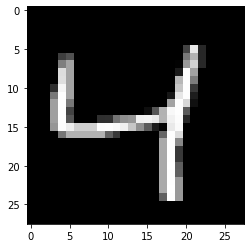

In [5]:
#Gray scale:
plt.imshow(x_train[2], cmap='gray')

In [6]:
#Data preprocessing

pred_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
pred_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

pred_train = pred_train.astype('float32')
pred_test = pred_test.astype('float32')

#Min-Max normalization:
pred_train /=255
pred_test /=255

#One-hot Encoding:
class_train = np_utils.to_categorical(y_train, 10)
class_test = np_utils.to_categorical(y_test, 10)

In [7]:
#Building the model

classifier = Sequential()
classifier.add(Conv2D(32, (3,3), input_shape = (28,28,1), activation = 'relu'))
classifier.add(BatchNormalization())
classifier.add(MaxPooling2D(pool_size = (2,2)))
classifier.add(Conv2D(32, (3,3), activation = 'relu'))
classifier.add(BatchNormalization())
classifier.add(MaxPooling2D(pool_size = (2,2)))
classifier.add(Flatten())
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dropout(0.2))
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dropout(0.2))
classifier.add(Dense(units = 10, activation = 'softmax'))

classifier.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [8]:
#Fit the model:

classifier.fit(pred_train,
                class_train,
                batch_size = 128,
                epochs = 30,
                validation_data = (pred_test, class_test))

Epoch 1/30
469/469 [==============================] - 32s 68ms/step - loss: 0.2251 - accuracy: 0.9312 - val_loss: 0.1073 - val_accuracy: 0.9708
Epoch 2/30
469/469 [==============================] - 30s 65ms/step - loss: 0.0660 - accuracy: 0.9807 - val_loss: 0.0393 - val_accuracy: 0.9874
Epoch 3/30
469/469 [==============================] - 31s 65ms/step - loss: 0.0475 - accuracy: 0.9859 - val_loss: 0.0413 - val_accuracy: 0.9878
Epoch 4/30
469/469 [==============================] - 29s 63ms/step - loss: 0.0366 - accuracy: 0.9883 - val_loss: 0.0360 - val_accuracy: 0.9898
Epoch 5/30
469/469 [==============================] - 29s 62ms/step - loss: 0.0320 - accuracy: 0.9903 - val_loss: 0.0359 - val_accuracy: 0.9896
Epoch 6/30
469/469 [==============================] - 30s 65ms/step - loss: 0.0246 - accuracy: 0.9924 - val_loss: 0.0402 - val_accuracy: 0.9900
Epoch 7/30
469/469 [==============================] - 30s 65ms/step - loss: 0.0237 - accuracy: 0.9931 - val_loss: 0.0304 - val_accuracy:

In [9]:
#Prediction

X_test = test/255
X_test = X_test.values
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

pred = classifier.predict(X_test)
pred.shape

(28000, 10)

In [10]:
#Submission

sample_submit = pd.read_csv("/kaggle/input/digit-recognizer/sample_submission.csv")
sample_submit.head()

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [11]:
y_pred = pred.argmax(axis=1)
ImageID = np.arange(len(y_pred))+1

submit = pd.DataFrame([ImageID,y_pred]).T
submit.rename(columns = {0:'ImageId', 1:'Label'})

submit.to_csv('submission.csv', header =  ['ImageId', 'Label' ], index = None) 